<h2>Import Tools</h2>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Get Data</h2>

In [2]:
df = pd.read_csv('ipl2024Matches.csv')

In [3]:
df.head()

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts
0,1,"March 22,2024",Banglore,Chennai,Banglore,Bat,173,6,176,4,Chennai,Mustafizur Rahman,Anuj Rawat,Mustafizur Rahman
1,2,"March 23,2024",Delhi,Punjab,Punjab,Field,174,9,177,6,Punjab,Sam Curran,Sam Curran,Kuldeep Yadav
2,3,"March 23,2024",Kolkata,Hyderabad,Hyderabad,Field,208,7,204,7,Kolkata,Andre Russell,Andre Russell,T Natarajan
3,4,"March 24,2024",Rajasthan,Lucknow,Rajasthan,Bat,193,4,173,6,Rajasthan,Sanju Samson,Sanju Samson,Trent Boult
4,5,"March 24,2024",Gujarat,Mumbai,Mumbai,Field,168,6,162,9,Gujarat,Sai Sudharsan,Dewald Brevis,Jasprit Bumrah


<h1><i>EDA : </i></h1>

In [4]:
df.shape

(74, 14)

<h5> - Total 74 match played by 14 teams</h5>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   74 non-null     int64 
 1   date                 74 non-null     object
 2   team1                74 non-null     object
 3   team2                74 non-null     object
 4   toss_winner          74 non-null     object
 5   decision             71 non-null     object
 6   first_score          74 non-null     int64 
 7   first_wkts           74 non-null     int64 
 8   second_score         74 non-null     int64 
 9   second_wkts          74 non-null     int64 
 10  winner               74 non-null     object
 11  player_of_the_match  71 non-null     object
 12  most_runs            71 non-null     object
 13  most_wkts            71 non-null     object
dtypes: int64(5), object(9)
memory usage: 8.2+ KB


In [6]:
df.isnull().sum()

id                     0
date                   0
team1                  0
team2                  0
toss_winner            0
decision               3
first_score            0
first_wkts             0
second_score           0
second_wkts            0
winner                 0
player_of_the_match    3
most_runs              3
most_wkts              3
dtype: int64

<h4> - Three matches with no result</h4>

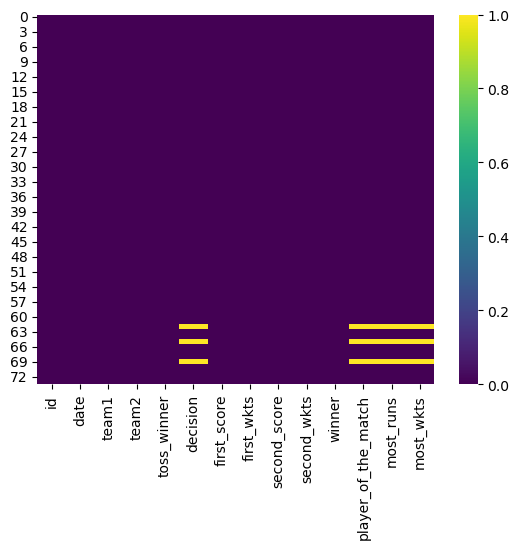

In [7]:
sns.heatmap(df.isnull(), cmap = 'viridis')
plt.show()

In [8]:
df.columns

Index(['id', 'date', 'team1', 'team2', 'toss_winner', 'decision',
       'first_score', 'first_wkts', 'second_score', 'second_wkts', 'winner',
       'player_of_the_match', 'most_runs', 'most_wkts'],
      dtype='object')

In [9]:
df.decision.unique()

array(['Bat', 'Field', nan], dtype=object)

**No Result Matches :**

In [10]:
df[df.isnull().any(axis = 1)]

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts
62,63,"May 13,2024",Gujarat,Kolkata,No Toss,NaN,0,0,0,0,Abandoned,NaN,NaN,NaN
65,66,"May 16,2024",Hyderabad,Gujarat,No Toss,NaN,0,0,0,0,Abandoned,NaN,NaN,NaN
69,70,"May 19,2024",Rajasthan,Kolkata,Kolkata,NaN,0,0,0,0,Abandoned,NaN,NaN,NaN


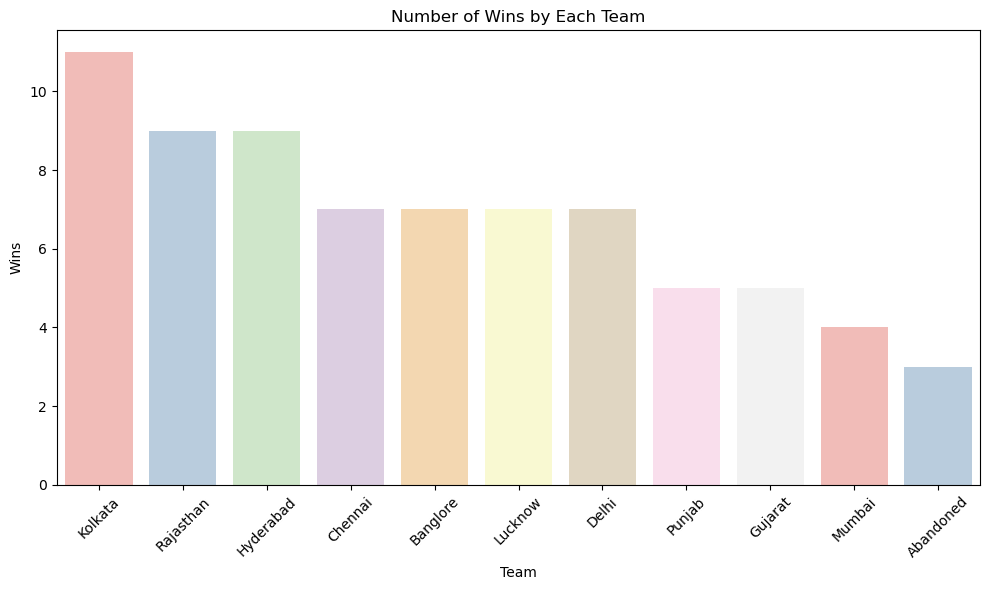

In [11]:
win_counts = df['winner'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=win_counts.index, y=win_counts.values, palette="Pastel1", hue = win_counts.index)
plt.title("Number of Wins by Each Team")
plt.xlabel("Team")
plt.ylabel("Wins")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

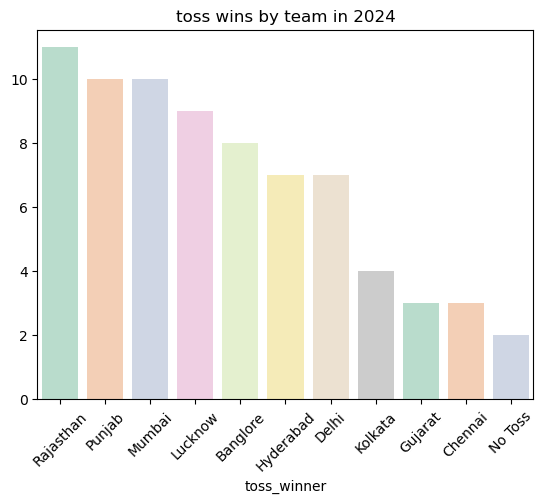

In [12]:
toss_wins =  df["toss_winner"].value_counts()
sns.barplot(x = toss_wins.index , y = toss_wins.values, palette='Pastel2', hue = toss_wins.index)
plt.xticks(rotation=45)
plt.title("toss wins by team in 2024")
plt.show()

Text(0.5, 1.0, 'Toss decision: ')

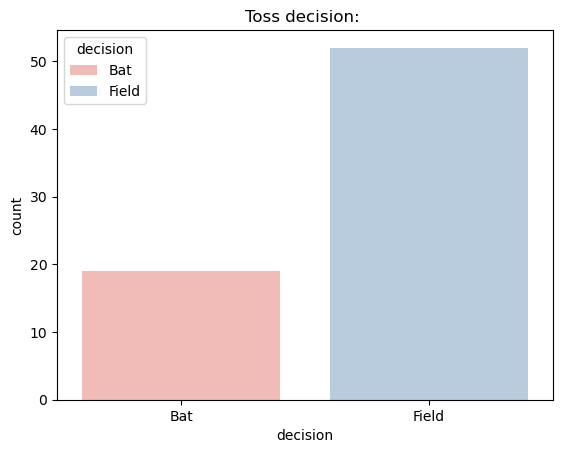

In [13]:
sns.countplot(data = df, x ='decision',palette="Pastel1",hue='decision',)
plt.title('Toss decision: ')

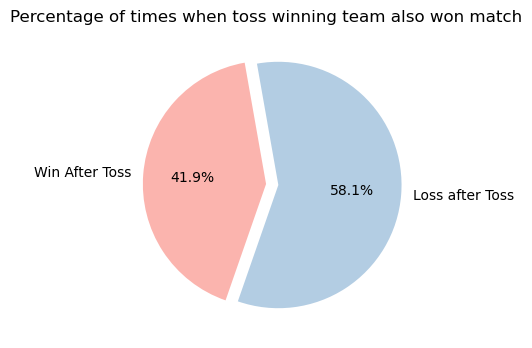

In [14]:
W=np.sum(df["toss_winner"]==df["winner"])
L=len(df)-W

plt.figure(figsize=(6,4))
colors=sns.color_palette("Pastel1")
plt.pie([W,L],labels=["Win After Toss","Loss after Toss"], autopct="%1.1f%%",colors=colors, explode=(0,0.1), startangle= 100)
plt.title("Percentage of times when toss winning team also won match")
plt.show()

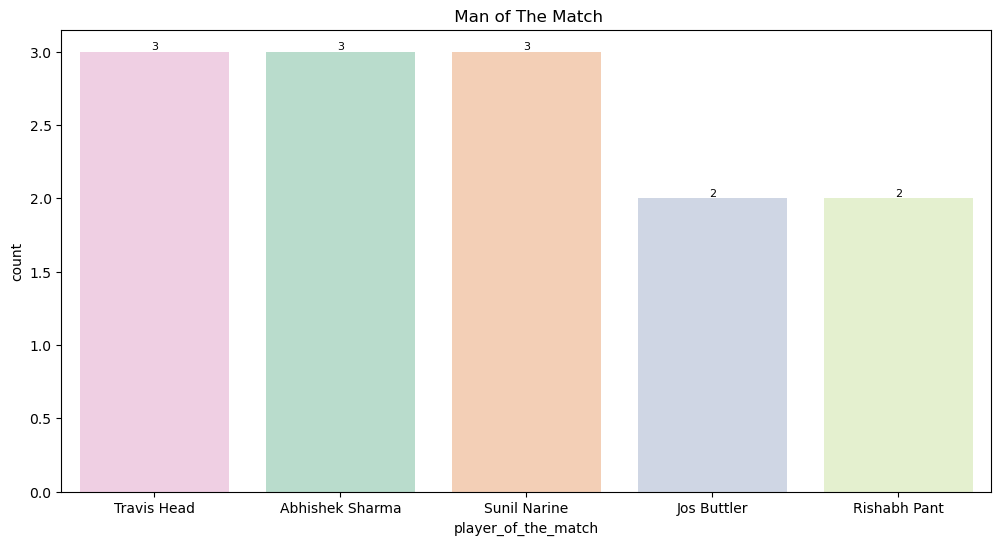

In [15]:
top5=df["player_of_the_match"].value_counts().nlargest(5).index
filter_df=df[df["player_of_the_match"].isin(top5)]

plt.figure(figsize=(12,6))
ax=sns.countplot(data=filter_df, x="player_of_the_match",palette="Pastel2",hue='player_of_the_match', order=top5)
for container in ax.containers:
    ax.bar_label(container, size=8, padding=0.2)
plt.title(" Man of The Match")
plt.show()

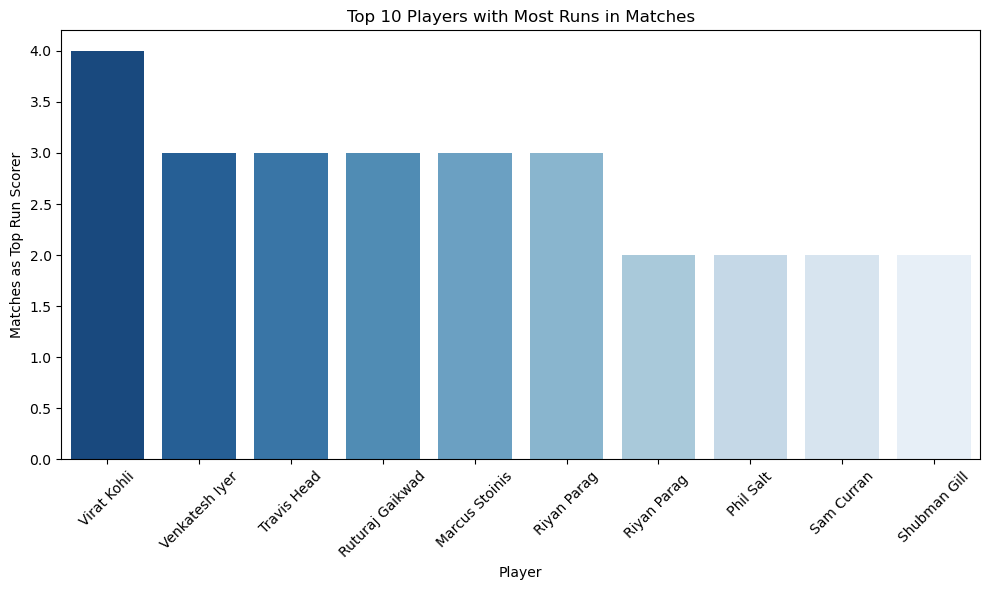

In [16]:
run_counts = df['most_runs'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=run_counts.values, x=run_counts.index, palette="Blues_r", hue = run_counts.index)
plt.xticks(rotation= 45)
plt.title("Top 10 Players with Most Runs in Matches")
plt.ylabel("Matches as Top Run Scorer")
plt.xlabel("Player")
plt.tight_layout()
plt.show()

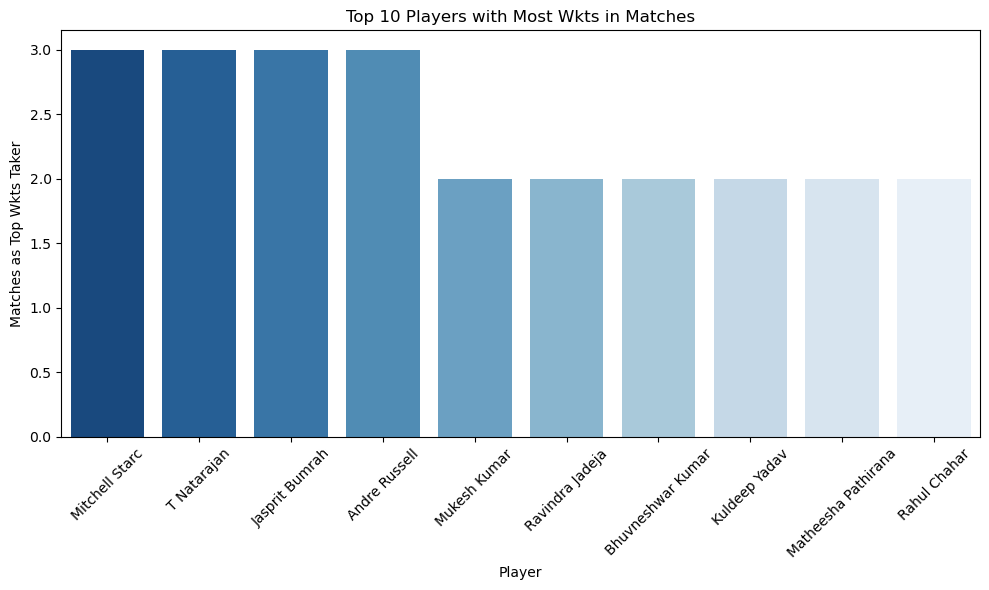

In [17]:
wicket_counts = df['most_wkts'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=wicket_counts.values, x=wicket_counts.index, palette="Blues_r", hue = wicket_counts.index)
plt.xticks(rotation= 45)
plt.title("Top 10 Players with Most Wkts in Matches")
plt.ylabel("Matches as Top Wkts Taker")
plt.xlabel("Player")
plt.tight_layout()
plt.show()

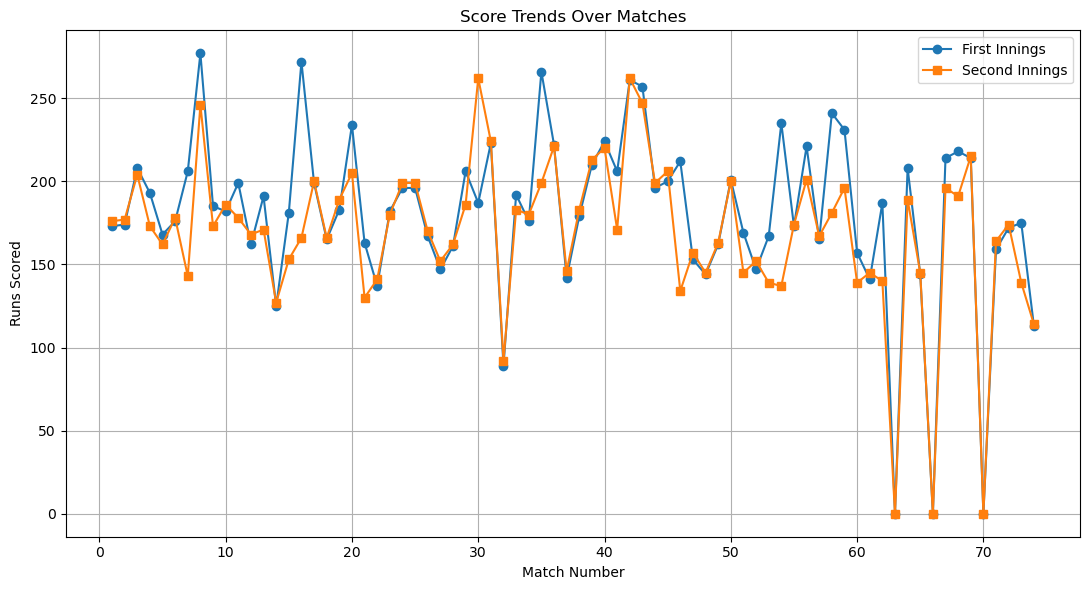

In [18]:
df['match_number'] = range(1, len(df) + 1)

plt.figure(figsize=(11, 6))
plt.plot(df['match_number'], df['first_score'], label='First Innings', marker='o')
plt.plot(df['match_number'], df['second_score'], label='Second Innings', marker='s')
plt.title("Score Trends Over Matches")
plt.xlabel("Match Number")
plt.ylabel("Runs Scored")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [144]:
won1=df[(df["first_score"]>df["second_score"]) & (df["decision"]=="Bat")]
df3=won1["winner"].value_counts().sum()
print('number of times bat first team won after winning the toss: ')
df3

number of times bat first team won after winning the toss: 


7

In [145]:
won2=df[(df["first_score"]>df["second_score"]) & (df["decision"]=="Field")]
df4=won2["winner"].value_counts().sum()
print('number of time bat first team won after lossing the toss')
df4

number of time bat first team won after lossing the toss


27

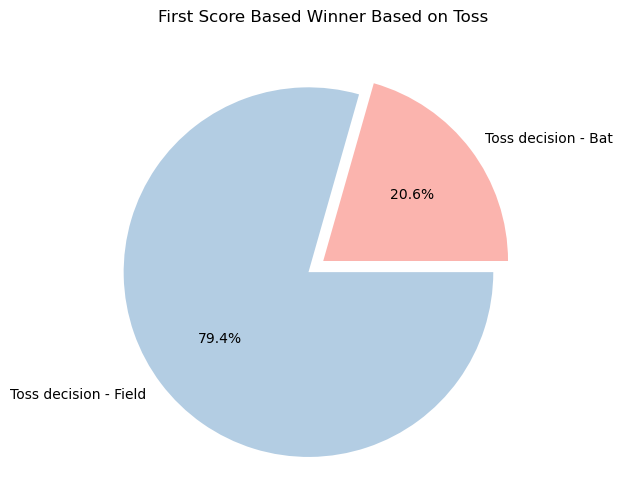

In [146]:
plt.figure(figsize=(6,6))
colors=sns.color_palette("Pastel1")
plt.pie([df3,df4], labels=["Toss decision - Bat","Toss decision - Field"], autopct="%1.1f%%", colors=colors,explode=[0,0.1])
plt.title("First Score Based Winner Based on Toss")
plt.show()

In [147]:
won3=df[(df["first_score"]< df["second_score"]) & (df["decision"]=="Bat")]
df5=won3["winner"].value_counts().sum()
print('number of times field first team won after lossing the toss: ')
df5

number of times field first team won after lossing the toss: 


12

In [148]:
won4=df[(df["first_score"]< df["second_score"]) & (df["decision"]=="Field")]
df6=won4["winner"].value_counts().sum()
print('number of times field first team won after winning the toss: ')
df6  

number of times field first team won after winning the toss: 


25

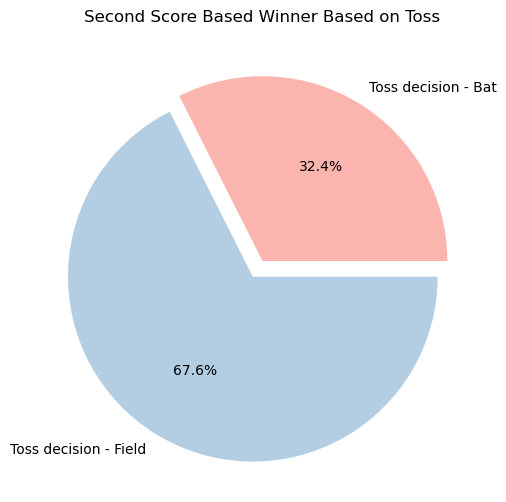

In [149]:
plt.figure(figsize=(6,6))
colors=sns.color_palette("Pastel1")
plt.pie([df5,df6], labels=["Toss decision - Bat","Toss decision - Field"], autopct="%1.1f%%", colors=colors,explode=[0,0.1])
plt.title("Second Score Based Winner Based on Toss")
plt.show()

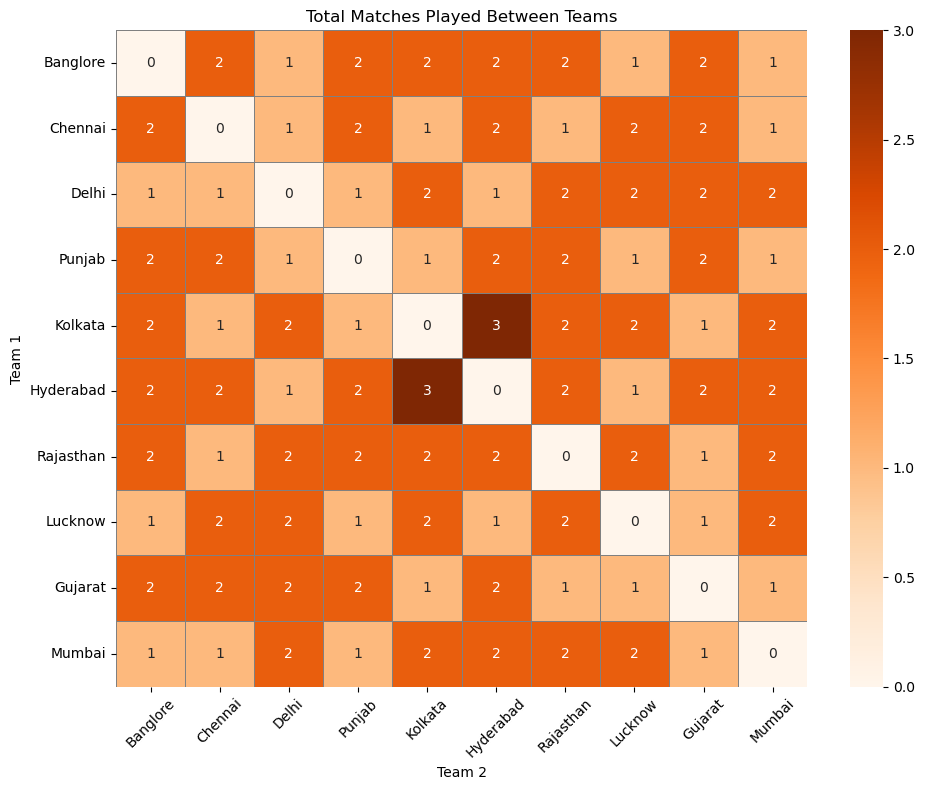

In [151]:
teams = pd.unique(df[['team1', 'team2']].values.ravel())
match_matrix = pd.DataFrame(0, index=teams, columns=teams)

# the matrix with match counts
for idx, row in df.iterrows():
    t1 = row['team1']
    t2 = row['team2']
    match_matrix.loc[t1, t2] += 1
    match_matrix.loc[t2, t1] += 1  # symmetric

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(match_matrix, annot=True, fmt="d", cmap="Oranges", linewidths=0.5, linecolor='gray')
plt.title("Total Matches Played Between Teams")
plt.xlabel("Team 2")
plt.ylabel("Team 1")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

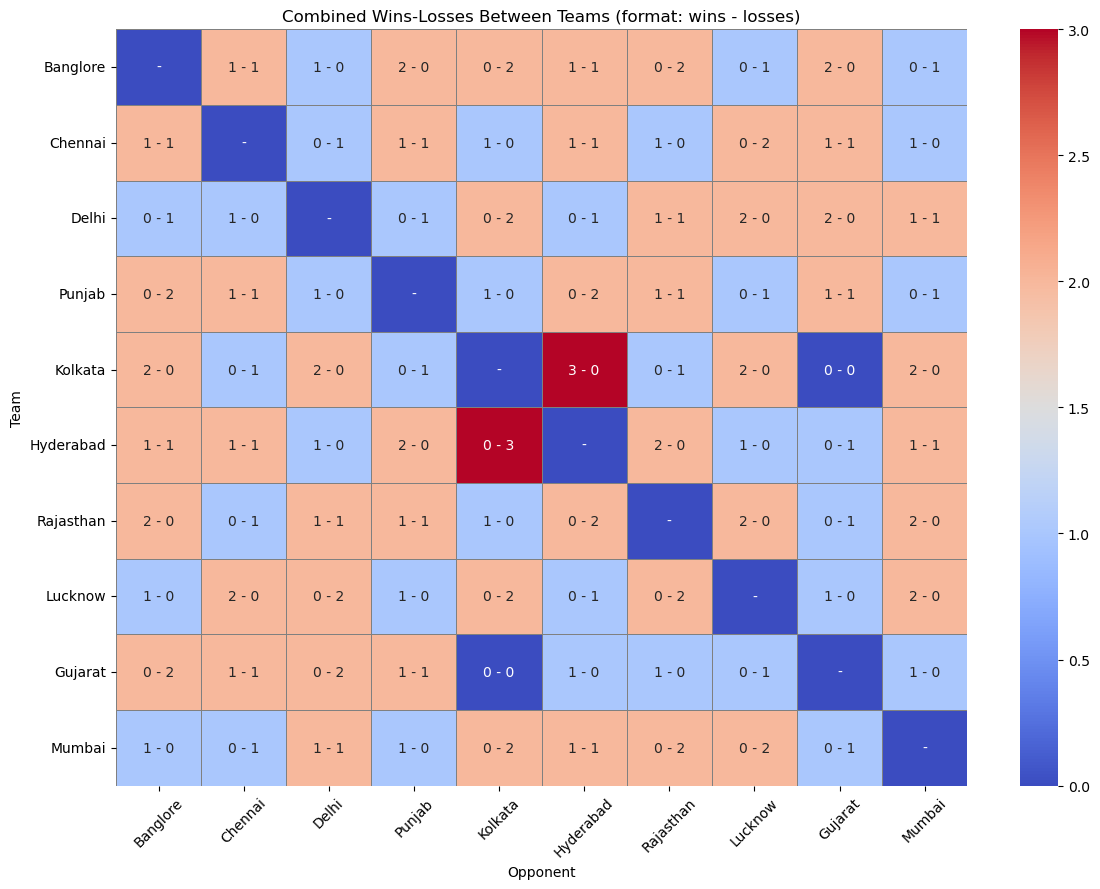

In [152]:
# empty win-loss matrix
win_loss_matrix = pd.DataFrame('', index=teams, columns=teams)

# First, count wins
win_counts = pd.DataFrame(0, index=teams, columns=teams)

for idx, row in df.iterrows():
    if row['winner'] == row['team1']:
        loser = row['team2']
    elif row['winner'] == row['team2']:
        loser = row['team1']
    else:
        continue
    win_counts.loc[row['winner'], loser] += 1

for team1 in teams:
    for team2 in teams:
        if team1 == team2:
            win_loss_matrix.loc[team1, team2] = "-"
        else:
            wins = win_counts.loc[team1, team2]
            losses = win_counts.loc[team2, team1]
            win_loss_matrix.loc[team1, team2] = f"{wins} - {losses}"

plt.figure(figsize=(12, 9))
sns.heatmap(win_counts + win_counts.T, annot=win_loss_matrix, fmt='', cmap="coolwarm", linewidths=0.5, linecolor='gray')
plt.title("Combined Wins-Losses Between Teams (format: wins - losses)")
plt.xlabel("Opponent")
plt.ylabel("Team")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
